In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:

env = gym.make('FrozenLake-v0')
Q = np.zeros([env.observation_space.n,env.action_space.n])
dis = .99

[2018-07-04 15:55:26,010] Making new env: FrozenLake-v0


Success rate :0.4805
Final Q-Table values
[[3.58178126e-01 8.58943636e-02 2.50762071e-01 4.97538954e-02]
 [1.32716527e-01 7.59969812e-04 1.94564104e-03 8.56820140e-02]
 [5.04834530e-03 9.63535098e-03 2.24131458e-03 1.20277973e-02]
 [3.92542239e-04 4.15859285e-04 9.68566323e-05 8.36202843e-04]
 [3.70344610e-01 2.74339626e-02 1.44793083e-01 1.05809331e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.03728579e-02 2.46340198e-02 2.94122167e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.40435177e-01 8.07936904e-02 1.28989685e-01 3.99252060e-01]
 [4.43094116e-02 4.33430646e-01 6.46272328e-02 9.94394530e-04]
 [1.01569224e-02 4.17433562e-01 1.16632206e-01 4.02324646e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.06387855e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.39423352e-01 3.59589649e-02]
 [0.00000000e

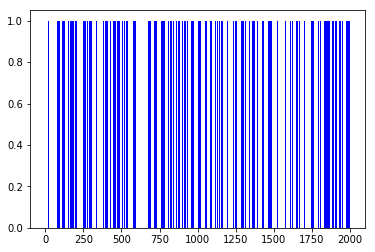

In [6]:
num_episodes = 2000
rList=[]
learning_rate = .1
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False 
    # E Greedy
    e = 1. / ((i // 100) + 1)
    while not done:
        # E Greedy
        #if np.random.rand(1) < e :
        #    action = env.action_space.sample()
        #else :
        #    action = np.argmax(Q[state,:])
        
        # Random Noise
        action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n) / (i +1))
        
        new_state, reward, done,_ = env.step(action)
        #Q[state,action] = reward + dis * np.max(Q[new_state,:])
        Q[state,action] = (1-learning_rate) * Q[state,action] + learning_rate * (reward + dis *np.max(Q[new_state,:]))
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)
    
print("Success rate :" + str(sum(rList)/num_episodes))
print("Final Q-Table values")
print(Q)
plt.bar(range(len(rList)), rList,color='blue')
plt.show()

In [4]:
np.random.rand?